### Problem Statement
Lith-ion power is the largest producer of electric vechicle(e-vehicle) batteries. They provide batteries on rent to e-vechicle drivers. Drivers rent a battery typically for a day and thereafter replacing it with a charged battery from the company. Lith-ion power has a variable pricing model based on the driver's driving history. Battery life depends on factors such as over speeding, distance driven per day,etc.
You are supposed to create a cluster model using `driver-data.csv` where drivers can be grouped together based on the driving data and group the datapoints so that drivers will be incentivized based on the cluster.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
from sklearn.cluster import KMeans
df1 = df.drop('id', axis=1)
kmeans2 = KMeans(n_clusters=2)

In [7]:
kmeans2.fit(df1)

KMeans(n_clusters=2)

In [8]:
kmeans2.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [9]:
print(kmeans2.labels_)
print(len(kmeans2.labels_))

[0 0 0 ... 1 1 1]
4000


In [10]:
print(type(kmeans2.labels_))
unique,counts = np.unique(kmeans2.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


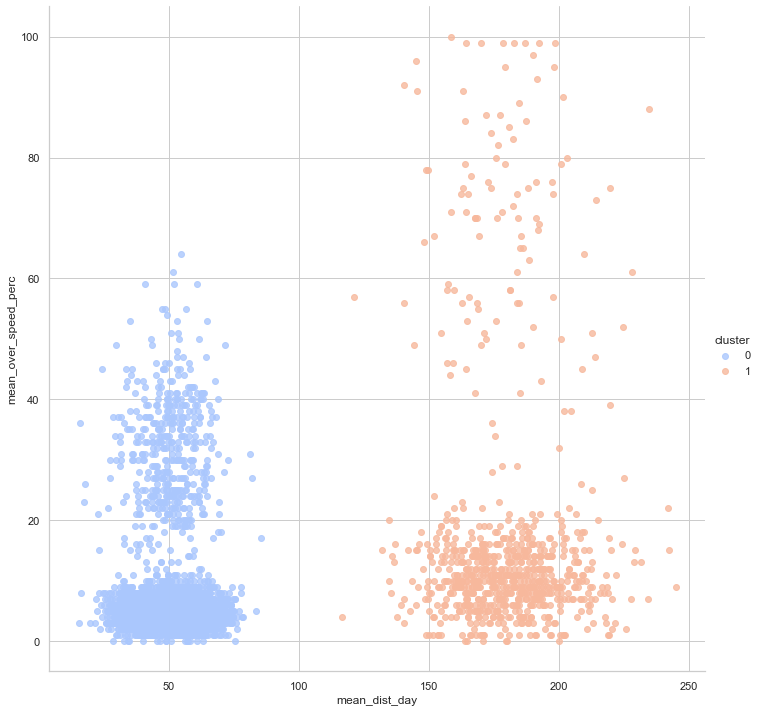

In [13]:
df1['cluster'] = kmeans2.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data=df1, hue='cluster', palette='coolwarm', size=10, aspect=1, fit_reg=False)

In [14]:
# Now using 4 clusters
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(df.drop('id',axis=1))
print(kmeans4.cluster_centers_)

[[ 50.40482436  32.36533958]
 [180.34311782  10.52011494]
 [ 49.99263253   5.20447169]
 [177.83509615  70.28846154]]


In [15]:
unique,counts = np.unique(kmeans4.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 427, 1: 696, 2: 2773, 3: 104}


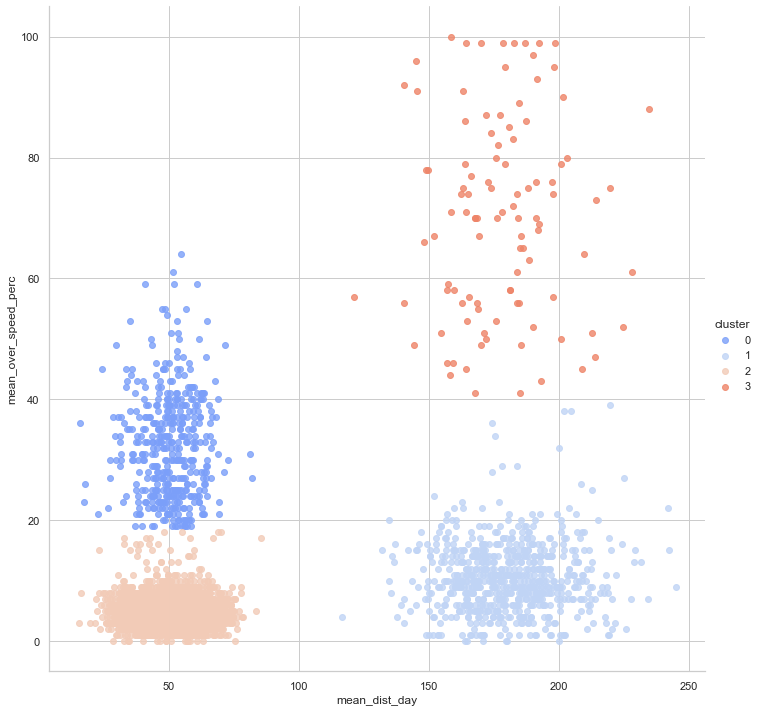

In [16]:
df1['cluster'] = kmeans4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data=df1, hue='cluster', palette='coolwarm', size=10, aspect=1, fit_reg=False)